In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
metro = pd.read_csv(r'C:\Users\HITESH KOTIAN\OneDrive\Desktop\Project\Metro_csv\metro.csv')
print('First few rows of Train data\n')
print(metro.sample(10))

First few rows of Train data

                 date_time is_holiday  air_pollution_index  humidity  \
33204  2017-04-30 15:00:00        NaN                  150        66   
15129  2014-06-20 17:00:00        NaN                   58        74   
6534   2013-05-30 20:00:00        NaN                   34        93   
2071   2012-12-16 11:00:00        NaN                  136        71   
2555   2012-12-31 20:00:00        NaN                  208        61   
22780  2016-04-25 05:00:00        NaN                  102        89   
17773  2015-08-27 23:00:00        NaN                  152        61   
32993  2017-04-24 08:00:00        NaN                  127        68   
33324  2017-05-03 05:00:00        NaN                  244        56   
14757  2014-05-30 16:00:00        NaN                  235       100   

       wind_speed  wind_direction  visibility_in_miles  dew_point  \
33204           2             344                    9          9   
15129           3             303      

In [3]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [4]:
metro.isnull().sum()

date_time                  0
is_holiday             33707
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
traffic_volume             0
dtype: int64

In [5]:
#  To remove the null value from holiday
metro['is_holiday'] = metro['is_holiday'].fillna('Working Day')
metro['is_holiday']

0        Working Day
1        Working Day
2        Working Day
3        Working Day
4        Working Day
            ...     
33745    Working Day
33746    Working Day
33747    Working Day
33748    Working Day
33749    Working Day
Name: is_holiday, Length: 33750, dtype: object

In [6]:
# datetime is in object form convert it into data time
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [7]:
metro['hour'] = metro['date_time'].dt.hour
metro['day'] = metro['date_time'].dt.day
metro['day of week'] = metro['date_time'].dt.day_of_week.replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
metro['month'] = metro['date_time'].dt.month
metro['year'] = metro['date_time'].dt.year

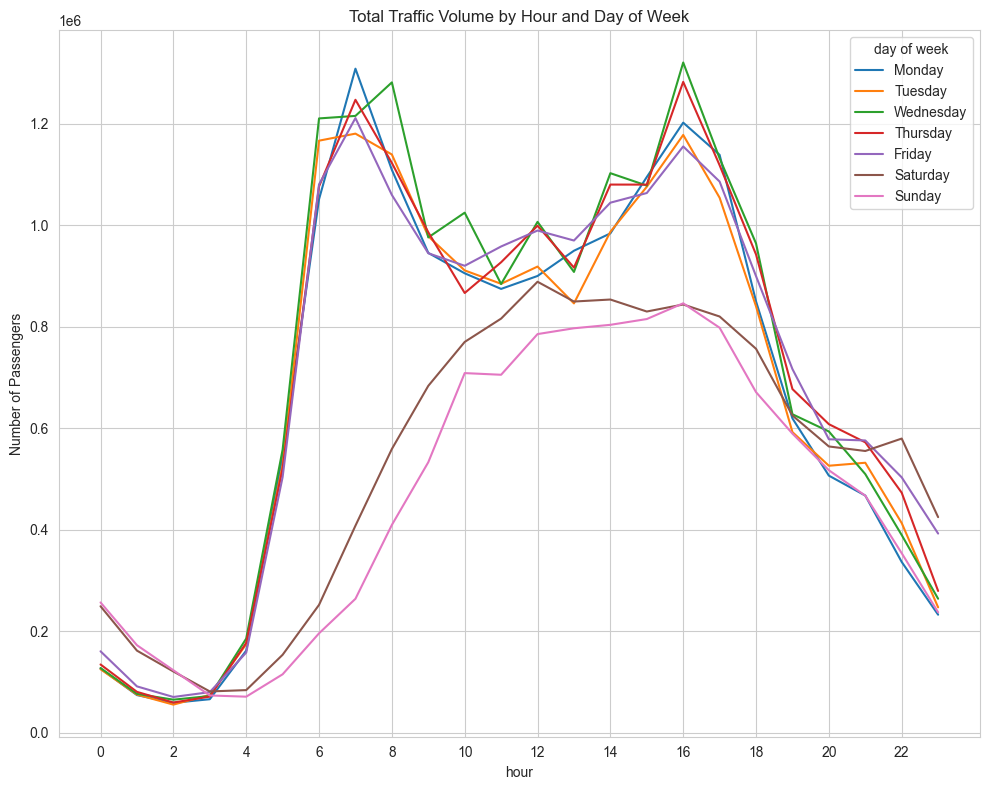

In [8]:
sn.set_style('whitegrid')

grouped_Data = metro.groupby(['hour', 'day of week'], as_index=False)['traffic_volume'].sum()

plt.figure(figsize=(10, 8))
sn.lineplot(
    data= grouped_Data, x='hour', y='traffic_volume', hue='day of week',
    hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='tab10')

plt.title('Total Traffic Volume by Hour and Day of Week')
plt.xticks(ticks=range(0, 24, 2))  
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()


There are two peak times for Delhi metro traffic: one at 7 a.m. in the morning 7 and another at 4 p.m. in the evening.

During the weekdays, the commuters traffic is the highest as compared to the weekends.

Weekends get peak traffic time from 12 noon to 4 in the evening.

 

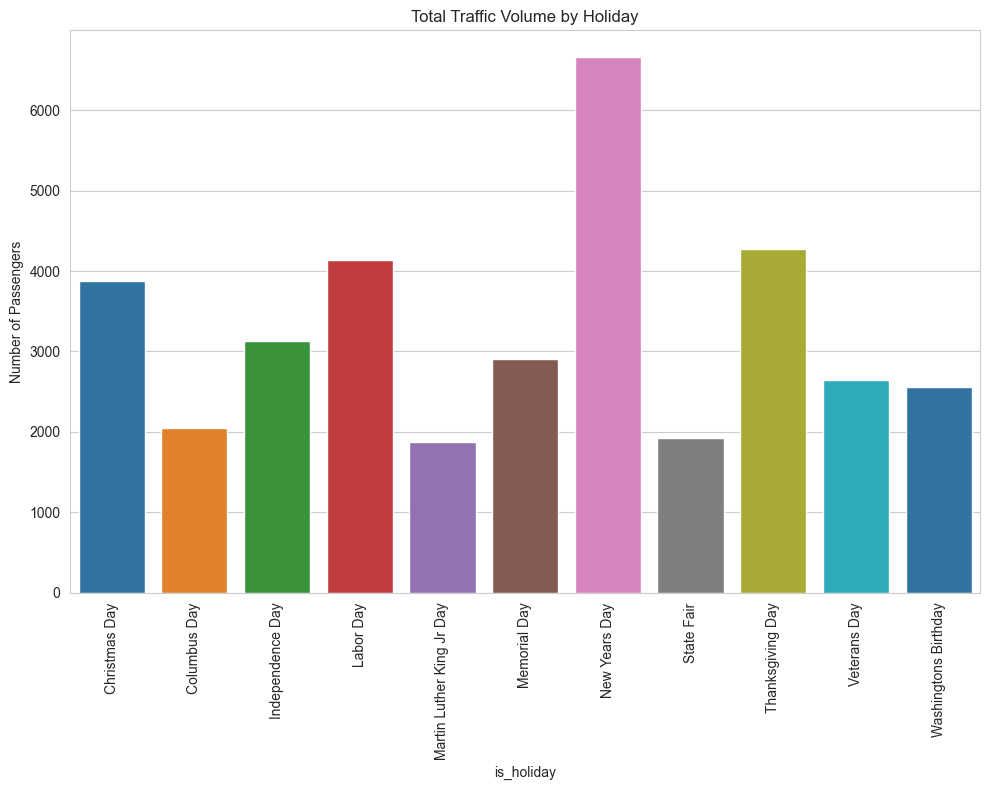

In [9]:
sn.set_style('whitegrid')

# We have to remove No holiday for better visualization of Holiday traffic
No_holiday_data = metro[metro['is_holiday'] != 'Working Day']

new_data = No_holiday_data.groupby('is_holiday', as_index=False)['traffic_volume'].sum()

plt.figure(figsize=(10, 8))
sn.barplot(new_data, x='is_holiday', y='traffic_volume', hue ='is_holiday', palette='tab10')

plt.title('Total Traffic Volume by Holiday')
plt.xticks(rotation=90)  
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()


Compared to working days, holidays have very few commuters.<br>
From the given data, we see that New Year's Day has the most passengers, while State Fair has the least.​​​​​​​

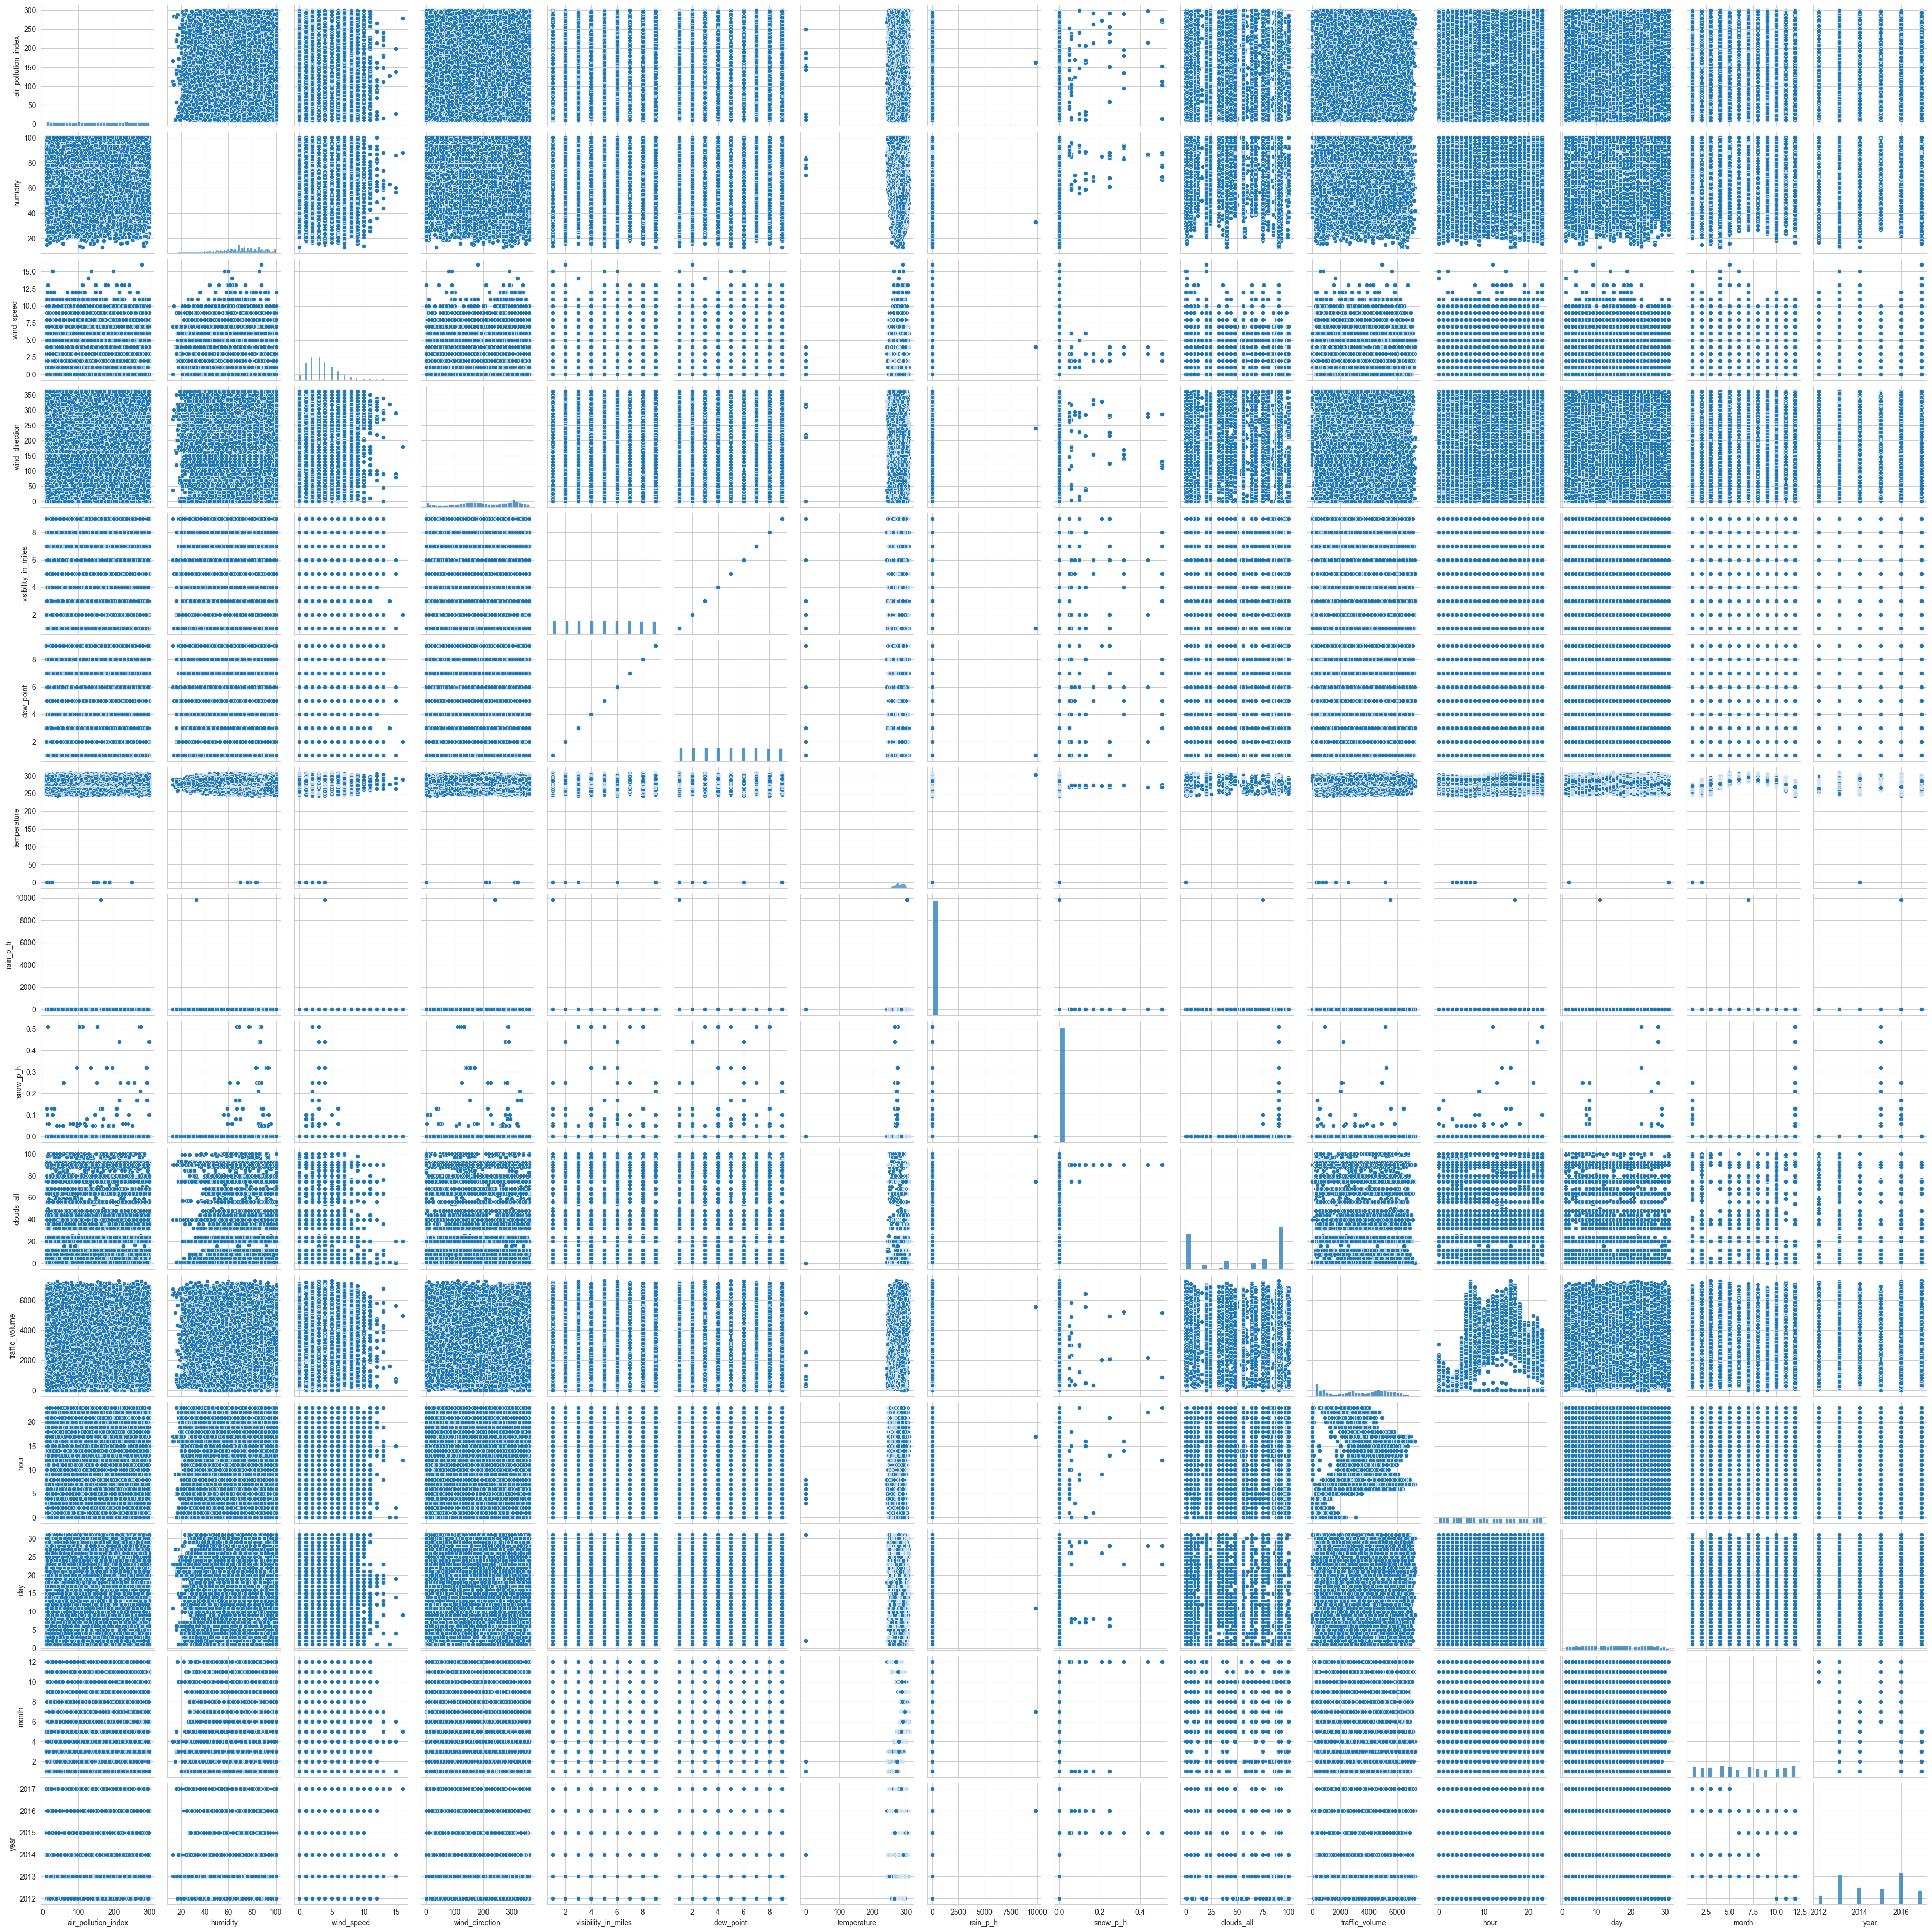

In [10]:
# To check the relation between weather we will see the pairplot
sn.pairplot(metro)

Temperature and rain_p_h shows the oultiers<br>
Dew point and Visibility shows the high correlation

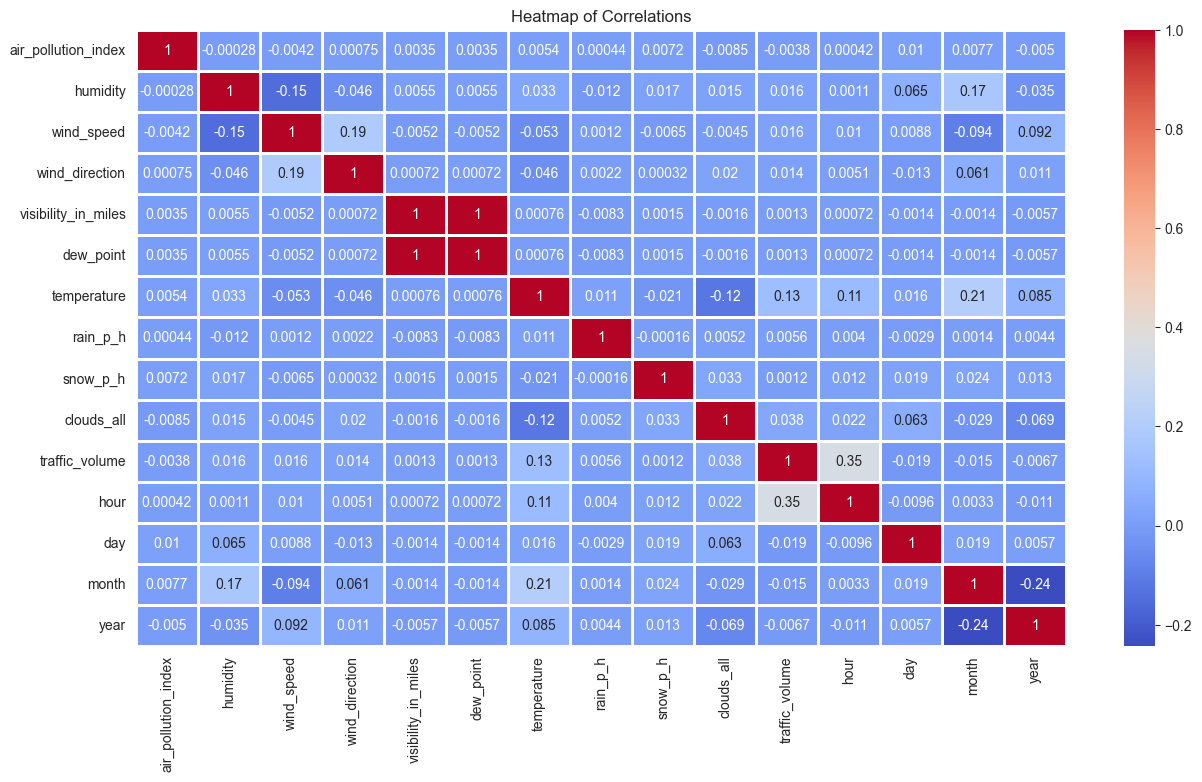

In [11]:
# Need to ignore some of the non numeric terms 
numeric_data = metro.select_dtypes(include=['number'])

plt.figure(figsize=(15, 8))
sn.heatmap(numeric_data.corr(), annot=True, linewidths=1, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()


Here, we demonstrate the proper correlation between the terms. From the pairplot, we know that dew point and visibility are strongly correlated; this can be verified here.

The traffic volume and time showed a good relationship. Of course, temperature and humidity are related to month because they depend on the season.

Interesting thing to see here is the relationship between temperature and traffic volume, which gives a connection to pollution and heat during peak hours.

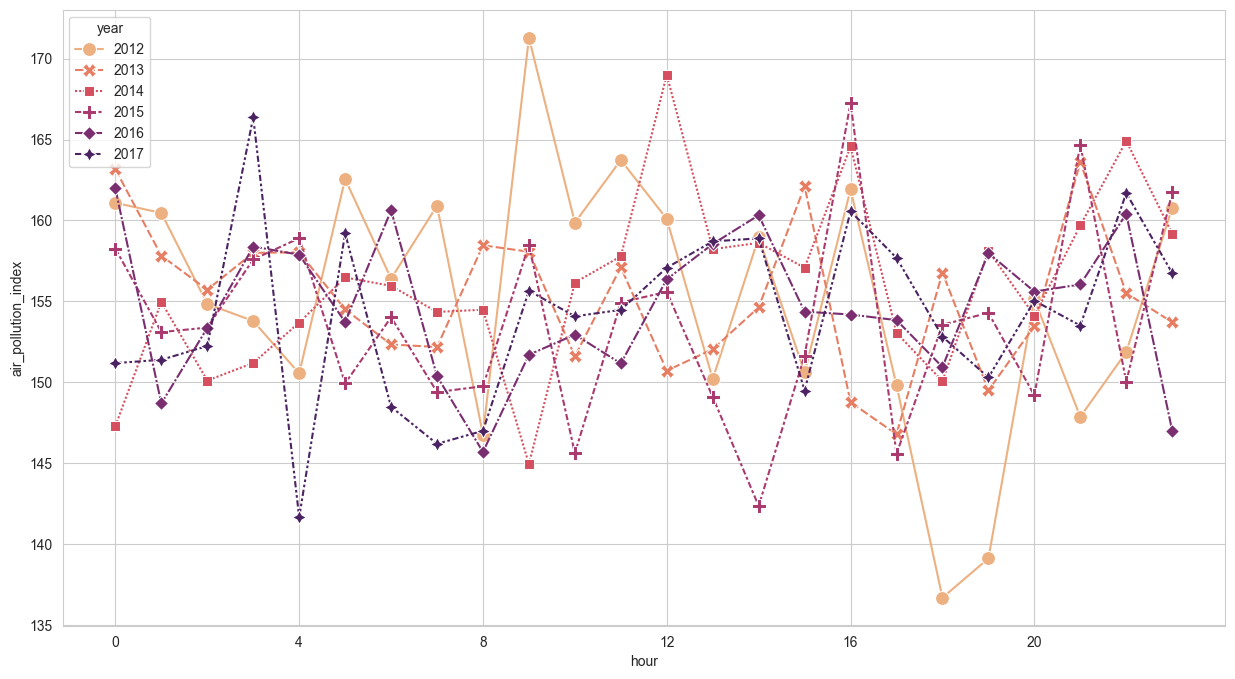

In [12]:
pollution_data = metro.groupby(['hour','year'],as_index=False)['air_pollution_index'].mean()
pollution_data

plt.figure(figsize=(15,8))
sn.lineplot(pollution_data, x = 'hour', y = 'air_pollution_index', hue= 'year',
            style='year',markers= True, markersize = 10, palette= 'flare' )
plt.xticks(ticks = range(0,24,4) )
plt.show()

The air pollution index shows significant variability throughout the day, with some hours experiencing higher pollution levels, possibly due to daily activities like traffic.

The air pollution index shows during the hour it follows the range of 150–160 while having some peaks and troughs during the time.

2012 was the year with most of the time going above the 160 range and touching 173 once at 9 a.m. and also dropping below 140 in the evening between 6 and 8 p.m.

2014 shows an index peak twice to and above 165, and 2017 only once at midnight.

During the morning peak hours, 2012 has the highest index, while in the evening peak hours, 2012, 2014, 2015, and 2017 have the peak index.

In [13]:
# Temperature is in Kelvin we need to convert it into celcius first to analyse
def change(temperature):
    return (temperature - 273.15)

metro['temperature'] = metro['temperature'].apply(change)

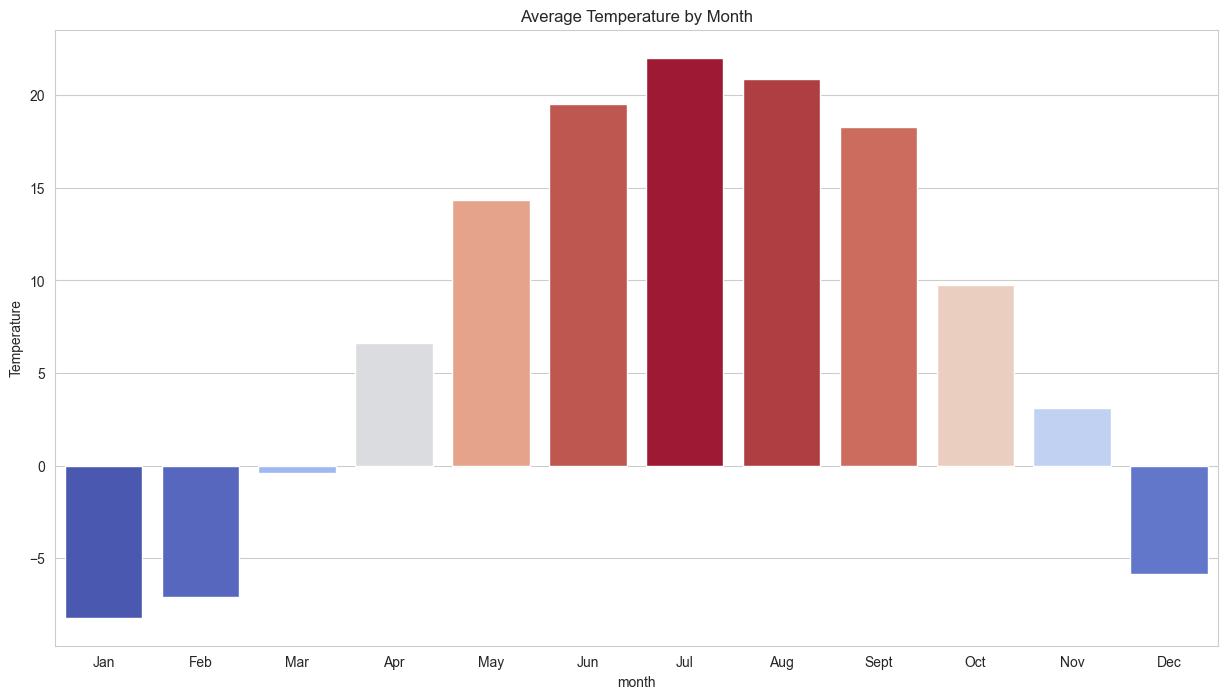

In [14]:
plt.figure(figsize= (15,8))

temperature_group = metro.groupby(['month'],as_index=False)['temperature'].mean()
sn.barplot(temperature_group, x = 'month', y = 'temperature',hue = 'temperature',
            palette= 'coolwarm', legend= False)
plt.ylabel('Temperature')
plt.xticks(ticks=range(12),
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.title('Average Temperature by Month')
plt.show()

December, January, and February have negative temperatures, as during this time it is the winter in India.

From the January peak in negative, it starts to increase in temperature until July, when it shows the peak, as from mid-March to July it is the summer season, and during July it is somewhat the start of the rainy season. 

From August to October it rains and somewhat temperature goes on decrease, going until negative from December and peaking in January to 8°C.

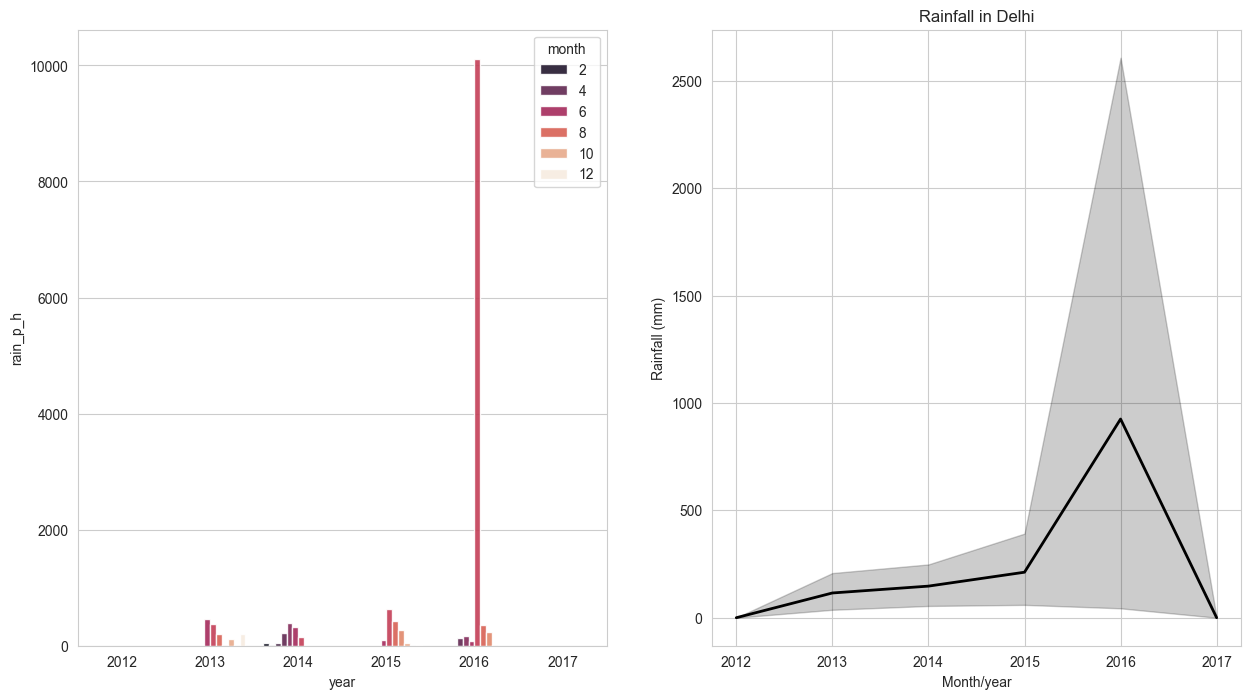

In [15]:
#  Rain is somewhat important thing for india, In delhi there is was recent water crisis so lets analyse rain every year

rain_group = metro.groupby(['month','year'], as_index=False)['rain_p_h'].sum()

fig , ax = plt.subplots(1,2, figsize=(15,8))

sn.barplot(rain_group, x= 'year', y = 'rain_p_h', hue = 'month',palette='rocket', alpha=0.9, ax = ax[0])

sn.lineplot(rain_group, x= 'year', y = 'rain_p_h',color='black', linewidth=2, ax = ax[1])

plt.xlabel('Month/year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall in Delhi')
plt.show()

There are no rainfall data for 2012 and 2017.

Delhi received a decent amount of rainfall from 2013 to 2015.<br>
2016 saw a huge jump in rainfall per hour, indicating a flood in between July and August.

The danger of the flood can be assumed by visualizing it is the 9 to 10 times more rainfall in a single month than the entire year Delhi experienced.